In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import numpy as np
from scipy.spatial import Delaunay

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the fraction of lotteries worse than p

In [ ]:
n = 4  #number of alternative = number of vertices
vertices_lowdim = np.eye(n)[:,:-1]
ssb_utility = np.triu(np.ones((n, n))) - np.tril(np.ones((n, n))) # transitive preferences

alpha = np.ones(n)
rng = np.random.default_rng()
p = rng.dirichlet(alpha)
p = np.array([0, 0.6, 0, 0.4])
# p_lowdim = p[:-1]

normal = p.T @ ssb_utility
#normal_lowdim = normal[:-1] - normal[-1]

p, normal

(array([0. , 0.6, 0. , 0.4]), array([-1. , -0.4,  0.2,  0.6]))

In [ ]:
new_vertices = []
limit = np.sum(normal <= 0)

for i in range(limit):
    for j in range(limit, n):
        vert = np.zeros(n)
        vert[i] = normal[j]/(normal[j] - normal[i])
        vert[j] = 1 - vert[i]
        new_vertices += [vert]

len(new_vertices)

0 2
0 3
1 2
1 3


[array([0.16666667, 0.        , 0.83333333, 0.        ]),
 array([0.375, 0.   , 0.   , 0.625]),
 array([0.        , 0.33333333, 0.66666667, 0.        ]),
 array([0. , 0.6, 0. , 0.4])]

In [66]:
# normal >= 0 for lotteries worse than p, i.e., p is preferred.
points = np.append(vertices_lowdim[normal >= 0], np.stack(new_vertices)[:,:-1], axis=0)
# in case too slow: https://stackoverflow.com/questions/24733185/volume-of-convex-hull-with-qhull-from-scipy
delaunay = Delaunay(points)
simplex_decomp = points[delaunay.simplices][:,1:,:] - points[delaunay.simplices][:,0,None]
volume = np.sum(np.abs(np.linalg.det(simplex_decomp)))
volume, np.abs(np.linalg.det(simplex_decomp))

(0.3097222222222221, array([0.15      , 0.05555556, 0.10416667]))

# Distribution of worse lotteries

In [4]:
#Given p, calculate fraction of worse lotteries, summarized in a function from above
def frac_worse(p: np.ndarray, ssb_utility: np.ndarray, vertices_lowdim: np.ndarray):
    normal = p.T @ ssb_utility
    new_vertices = []
    limit = np.sum(normal <= 0)

    for i in range(limit):
        for j in range(limit, n):
            vert = np.zeros(n)
            vert[i] = normal[j]/(normal[j] - normal[i])
            vert[j] = 1 - vert[i]
            new_vertices += [vert]
    
    # normal >= 0 for lotteries worse than p, i.e., p is preferred.
    points = np.append(vertices_lowdim[normal >= 0], np.stack(new_vertices)[:,:-1], axis=0)
    # in case too slow: https://stackoverflow.com/questions/24733185/volume-of-convex-hull-with-qhull-from-scipy
    delaunay = Delaunay(points)
    simplex_decomp = points[delaunay.simplices][:,1:,:] - points[delaunay.simplices][:,0,None]
    volume = np.sum(np.abs(np.linalg.det(simplex_decomp)))
    return volume

In [27]:
def create_histogram(n: int):
    vertices_lowdim = np.eye(n)[:,:-1]
    ssb_utility = np.triu(np.ones((n, n))) - np.tril(np.ones((n, n))) # transitive preferences
    alpha = np.ones(n)
    rng = np.random.default_rng()
    fractions_list = []
    for _ in range(1000):
        p = rng.dirichlet(alpha)
        fractions_list.append(frac_worse(p, ssb_utility, vertices_lowdim))
    fractions_df = pd.DataFrame(data=fractions_list, columns=["frac_worse"])
    sns.histplot(data=fractions_df, bins=20).set_title(f'n={n}')
    plt.show()

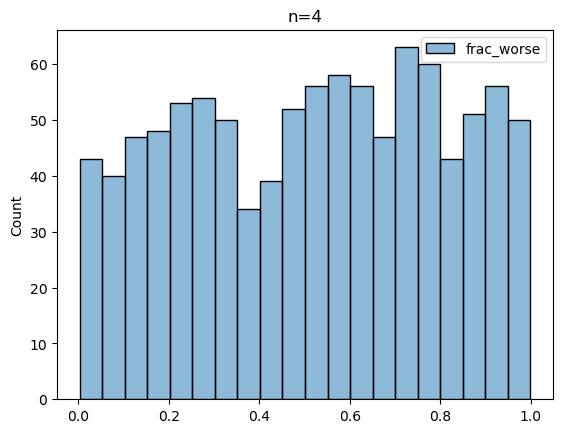

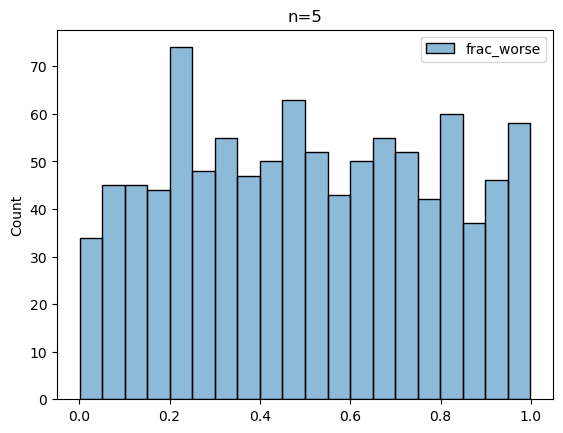

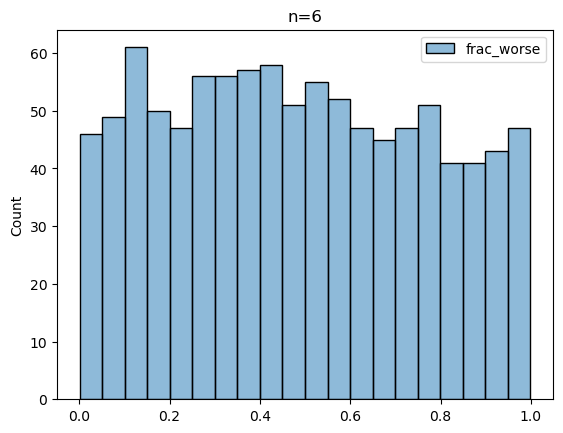

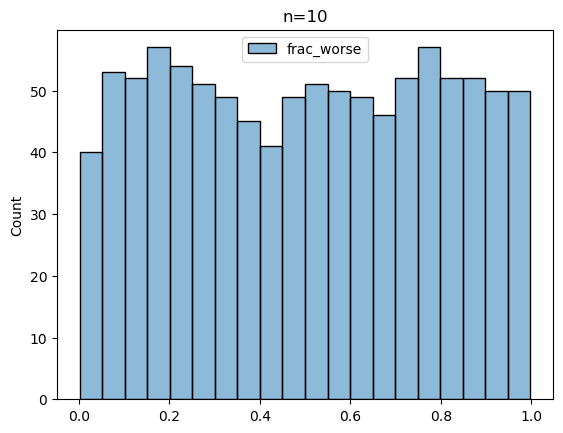

In [ ]:
n_list = [4, 5, 6, 10, 20, 30, 40, 50]
for n in n_list:
    create_histogram(n)


In [ ]:
# interrupted after approx. 60 minutes